# Text Classification Learning Process

# 1.Background information

The Traditional Machine Learning can be processed by the the standard process for data mining "CRISP-DM". However, the processing of NLP's Text Classification task is slightly different from the conventional machine learning process. We need to make some subtle adjustments to the process based on the Crisp-DM model. 

<img src="CRISP-DM_Process.jpg" width="60%">

### 1.1 Text Classification Process(Based on CRISP-DM process)
The following is a summary of some of the processing procedures for dealing with Text Classification problems that I have obtained by looking through different projects, materials and papers from the internet. 

* Business Understanding
* Data Exploratory
* Data Preparation
    * Feature Engineering
        * Text cleaning
        * Text representation
        * Label coding
        * Train — test split
* Modeling
    * Hyperparameter tuning methodology and models
* Evaluation
    * Performance Measurement
    * Best Model Selection
    * Model Interpretation
* Deployment

# 2. Business Understanding


## Business Understanding

### The task is a binary label's text classification. By training the original text and labels to predict new text's label.

# 3. Data Exploratory

#### Input data

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
df = pd.read_table('./dataset_of_text_classification.txt',header=None)
df.columns = ['raw']
df.head(10)

,raw
0,__label__2 Stuning even for the non-gamer: Thi...
1,__label__2 The best soundtrack ever to anythin...
2,__label__2 Amazing!: This soundtrack is my fav...
3,__label__2 Excellent Soundtrack: I truly like ...
4,"__label__2 Remember, Pull Your Jaw Off The Flo..."
5,__label__2 an absolute masterpiece: I am quite...
6,__label__1 Buyer beware: This is a self-publis...
7,__label__2 Glorious story: I loved Whisper of ...
8,__label__2 A FIVE STAR BOOK: I just finished r...
9,__label__2 Whispers of the Wicked Saints: This...


#### Extracting response feature as a new column

In [3]:
# Extracting label column into a new column
df['label'] = df['raw'].str.extract('(__label__.)', expand=True)

# Remove the label from the raw text, and The rest of the text is extracted into a new column
df['text'] = df['raw'].str.replace('(__label__.)','')
df.head(20)

,raw,label,text
0,__label__2 Stuning even for the non-gamer: Thi...,__label__2,Stuning even for the non-gamer: This sound tr...
1,__label__2 The best soundtrack ever to anythin...,__label__2,The best soundtrack ever to anything.: I'm re...
2,__label__2 Amazing!: This soundtrack is my fav...,__label__2,Amazing!: This soundtrack is my favorite musi...
3,__label__2 Excellent Soundtrack: I truly like ...,__label__2,Excellent Soundtrack: I truly like this sound...
4,"__label__2 Remember, Pull Your Jaw Off The Flo...",__label__2,"Remember, Pull Your Jaw Off The Floor After H..."
5,__label__2 an absolute masterpiece: I am quite...,__label__2,an absolute masterpiece: I am quite sure any ...
6,__label__1 Buyer beware: This is a self-publis...,__label__1,"Buyer beware: This is a self-published book, ..."
7,__label__2 Glorious story: I loved Whisper of ...,__label__2,Glorious story: I loved Whisper of the wicked...
8,__label__2 A FIVE STAR BOOK: I just finished r...,__label__2,A FIVE STAR BOOK: I just finished reading Whi...
9,__label__2 Whispers of the Wicked Saints: This...,__label__2,Whispers of the Wicked Saints: This was a eas...


## 3.1 Data balance
One of our main concerns is whether the different classes are balanced. This means that the dataset contains an approximately equal portion of each class.There are several ways of dealing with imbalanced datasets. 

In [4]:
df['text'].apply(lambda x: len(x.split(' '))).sum()

805532

The dataset is only 800k words. It is quite small but makes sure we don't have to wait a long time for the code to complete.

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'label'),
 Text(0.5, 1.0, 'number of labels in each category')]

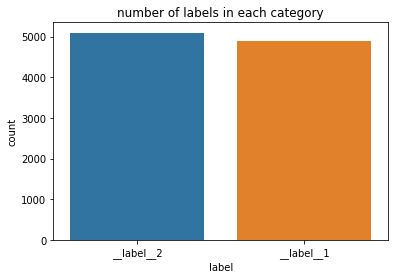

In [5]:
fig,ax = plt.subplots()
sns.barplot(x= df.label.unique(),y= df.label.value_counts())
ax.set(xlabel='label', ylabel='count',title="number of labels in each category")

The classes are very well balanced!

## 3.2 Checking the quality of text
Checking for any messy code or website tag or post that needs to be clean up

In [6]:
def print_plot(index, text_column):
    example = df[df.index == index][['label', text_column]].values[0]
    if len(example) > 0:
        print('label:', example[0])
        print('text:', example[1])
        print('\t')
        
print_plot(0, 'text')
print_plot(20, 'text')
print_plot(100, 'text')

label: __label__2
text:  Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
	
label: __label__1
text:  mens ultrasheer: This model may be ok for sedentary types, but I'm active and get around alot in my job - consistently found these stockings rolled up down by my ankles! Not Good!! Solution: go with the standard compression stocking, 20-30, stock #114622. Excellent support, stays up and gives me what I need. Both pair of these also tore as I struggled to pull them up all the time. Good riddance/bad investment!
	
label: __label__2
text:  textbook: Book shipped quickly and was in excellent condition as stated. Easy tr

As we can see, there are some emotion icons in the text need to be cleaned up.

# 4. Data Preparation

## 4.1 Feature Engineering

### 4.1.1 Text Cleaning

Before creating any feature from the raw text, we must perform a cleaning process to ensure no distortions are introduced to the model. We have followed these steps:

* Special character cleaning
* Upcase/downcase
* Punctuation signs
* Possessive pronouns
* Stemming or Lemmatization
* Stop words

In [7]:
REPLACE_BY_SPACE_RE = re.compile('[#_/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))


def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

df['clean_text'] = df['text'].apply(clean_text)

df['label'].loc[df['label'] == '__label__1'] = 'one'
df['label'].loc[df['label'] == '__label__2'] = 'two'

print_plot(20, 'label')
print_plot(20, 'clean_text')



label: one
text: one
	
label: one
text: mens ultrasheer model may ok sedentary types im active get around alot job consistently found stockings rolled ankles good solution go standard compression stocking 2030 stock 114622 excellent support stays gives need pair also tore struggled pull time good riddance bad investment
	


In [8]:
df.head(10)

,raw,label,text,clean_text
0,__label__2 Stuning even for the non-gamer: Thi...,two,Stuning even for the non-gamer: This sound tr...,stuning even nongamer sound track beautiful pa...
1,__label__2 The best soundtrack ever to anythin...,two,The best soundtrack ever to anything.: I'm re...,best soundtrack ever anything im reading lot r...
2,__label__2 Amazing!: This soundtrack is my fav...,two,Amazing!: This soundtrack is my favorite musi...,amazing soundtrack favorite music time hands i...
3,__label__2 Excellent Soundtrack: I truly like ...,two,Excellent Soundtrack: I truly like this sound...,excellent soundtrack truly like soundtrack enj...
4,"__label__2 Remember, Pull Your Jaw Off The Flo...",two,"Remember, Pull Your Jaw Off The Floor After H...",remember pull jaw floor hearing youve played g...
5,__label__2 an absolute masterpiece: I am quite...,two,an absolute masterpiece: I am quite sure any ...,absolute masterpiece quite sure actually takin...
6,__label__1 Buyer beware: This is a self-publis...,one,"Buyer beware: This is a self-published book, ...",buyer beware selfpublished book want know whyr...
7,__label__2 Glorious story: I loved Whisper of ...,two,Glorious story: I loved Whisper of the wicked...,glorious story loved whisper wicked saints sto...
8,__label__2 A FIVE STAR BOOK: I just finished r...,two,A FIVE STAR BOOK: I just finished reading Whi...,five star book finished reading whisper wicked...
9,__label__2 Whispers of the Wicked Saints: This...,two,Whispers of the Wicked Saints: This was a eas...,whispers wicked saints easy read book made wan...


In [9]:
df['clean_text'].apply(lambda x: len(x.split(' '))).sum()

412692

After text cleaning and removing stop words and some symbol words, we have only over 4 million words to work with!

### 4.1.2 Train — test split

Spiliting data set into tran dataset and test dataset, there are some methods we choose:
* 80% for training dataset and 20% for testing dataset
* k-folds cross validation

In [10]:
# 70% for training dataset and 30% for testing dataset
text = df.clean_text
labels = df.label
X_train, X_test, y_train, y_test = train_test_split(text, labels, test_size=0.2, random_state = 66)

### 4.1.3 Text Representation

in order to represent our text, every row of the dataset will be a single document of the corpus. The columns (features) will be different depending of which feature creation method we choose:

* Tokenzation
* Count Vectors as features
* TF-IDF Vectors as features
    * Word level
    * N-Gram level
    * Character level
* Word Embeddings as features(GloVe, FastText, and Word2Vec)

And we could choose the sklean.pipeline to help us build text representation and modeling together 

### Count Vectors as features
Count Vector is a matrix notation of the dataset in which every row represents a document from the corpus, every column represents a term from the corpus, and every cell represents the frequency count of a particular term in a particular document.

In [11]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(df['text'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(X_train)
xtest_count =  count_vect.transform(X_test)

### TF-IDF Vectors as features
TF-IDF score represents the relative importance of a term in the document and the entire corpus. TF-IDF score is composed by two terms: the first computes the normalized Term Frequency (TF), the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)
IDF(t) = log_e(Total number of documents / Number of documents with term t in it)

TF-IDF Vectors can be generated at different levels of input tokens (words, characters, n-grams)

* Word Level TF-IDF : Matrix representing tf-idf scores of every term in different documents
* N-gram Level TF-IDF : N-grams are the combination of N terms together. This Matrix representing tf-idf scores of N-grams
* Character Level TF-IDF : Matrix representing tf-idf scores of character level n-grams in the corpus

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', max_df=0.7)
tfidf_vect.fit(df['text'])
xtrain_tfidf =  tfidf_vect.transform(X_train)
xtest_tfidf =  tfidf_vect.transform(X_test)

# ngram level tf-idf 
# setting ngram_range(2,3) represents two word and three word markers
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', ngram_range=(2,3), max_df=0.7)
tfidf_vect_ngram.fit(df['text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(X_train)
xtest_tfidf_ngram =  tfidf_vect_ngram.transform(X_test)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', ngram_range=(2,3), max_df=0.7)
tfidf_vect_ngram_chars.fit(df['text'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_train) 
xtest_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_test) 

# 5. Modeling

We have tried the following models:

* Conventional Machine Learning Algorithm
    * Random Forest
    * SVM
    * NB(Naive Bayes)
    * Logistic Regression
    * Gradient Boosting
* Deep learning Algorithm(Based on unqiue data transformation process and training process)
    * BERT
    * LSTM
    * CNN
    ...


#### I build a utility function which can be used to train a model. It accepts the classifier, feature_vector of training data, labels of training data and feature vectors of valid data as inputs. Using these inputs, the model is trained and accuracy score is computed.

In [16]:
import sklearn.metrics as metrics
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, y_test)

### Naive Bayes

In [17]:
import sklearn.naive_bayes as naive_bayes


# Naive Bayes on Count Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, y_train, xtest_count)
print ("NB, Count Vectors: ", accuracy)

# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, y_train, xtest_tfidf)
print ("NB, WordLevel TF-IDF: ", accuracy)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram)
print ("NB, N-Gram Vectors: ", accuracy)

# Naive Bayes on Character Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars)
print ("NB, CharLevel Vectors: ", accuracy)

NB, Count Vectors:  0.826
NB, WordLevel TF-IDF:  0.831
NB, N-Gram Vectors:  0.7735
NB, CharLevel Vectors:  0.797


### Logistic Regression

In [18]:
import sklearn.linear_model as linear_model

# Linear Classifier on Count Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_count, y_train, xtest_count)
print ("LR, Count Vectors: ", accuracy)

# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf, y_train, xtest_tfidf)
print ("LR, WordLevel TF-IDF: ", accuracy)

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram)
print ("LR, N-Gram Vectors: ", accuracy)

# Linear Classifier on Character Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars)
print ("LR, CharLevel Vectors: ", accuracy)

LR, Count Vectors:  0.846
LR, WordLevel TF-IDF:  0.845
LR, N-Gram Vectors:  0.775
LR, CharLevel Vectors:  0.8235


### SVM
The model extracts a best possible hyper-plane / line that segregates the two classes. 

In [19]:
from sklearn import svm

# SVM on Count Vectors
accuracy = train_model(svm.SVC(), xtrain_count, y_train, xtest_count)
print ("SVM, Count Vectors: ", accuracy)

# SVM on Word Level TF IDF Vectors
accuracy = train_model(svm.SVC(), xtrain_tfidf, y_train, xtest_tfidf)
print ("SVM, WordLevel TF-IDF: ", accuracy)

# SVM on Ngram Level TF IDF Vectors
accuracy = train_model(svm.SVC(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram)
print ("SVM, N-Gram Vectors: ", accuracy)

SVM, Count Vectors:  0.8365
SVM, WordLevel TF-IDF:  0.8485
SVM, N-Gram Vectors:  0.7785


### Random Forest Model
Random Forest models are a type of ensemble models, particularly bagging models. They are part of the tree based model family.

In [20]:
from sklearn import ensemble

# RF on Count Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_count, y_train, xtest_count)
print ("RF, Count Vectors: ", accuracy)

# RF on Word Level TF IDF Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, y_train, xtest_tfidf)
print ("RF, WordLevel TF-IDF: ", accuracy)

RF, Count Vectors:  0.826
RF, WordLevel TF-IDF:  0.8255


###  Gradient Boosting 

In [21]:
from xgboost import XGBClassifier

# Gradient Boosting on Count Vectors
accuracy = train_model(XGBClassifier(), xtrain_count, y_train, xtest_count.tocsc())
print ("Xgb, Count Vectors: ", accuracy)

# Gradient Boosting on Word Level TF IDF Vectors
accuracy = train_model(XGBClassifier(), xtrain_tfidf, y_train, xtest_tfidf.tocsc())
print ("Xgb, WordLevel TF-IDF: ", accuracy)

# Gradient Boosting on Character Level TF IDF Vectors
accuracy = train_model(XGBClassifier(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars.tocsc())
print ("Xgb, CharLevel Vectors: ", accuracy)

Xgb, Count Vectors:  0.824
Xgb, WordLevel TF-IDF:  0.8105
Xgb, CharLevel Vectors:  0.792


We achieve a higher accuracy score of 84.6% which is 0.1% improvement over Naive Bayes and 0.05% improvement over Logistic Regression

# 6. Evaluation

## 6.1 Performance Measurement

When dealing with classification problems, there are several metrics that can be used to gain insights on how the model is performing. Some of them are:
 
 * Accuracy
 * confusion matrix
 * Precision
 * Recall
 * F1-Score
 * ROC
 * classification report(for the SVM)

### Confusion matrix
Continue with our best model (LinearSVC), we are going to look at the confusion matrix, and show the discrepancies between predicted and actual labels.

In [13]:
from sklearn import svm
from sklearn.metrics import confusion_matrix

model = svm.SVC()
model.fit(xtrain_tfidf, y_train)
y_pred = model.predict(xtest_tfidf)

In [14]:
conf_mat = confusion_matrix(y_test, y_pred, labels=['one', 'two'])
conf_mat

array([[880, 145],
       [158, 817]], dtype=int64)

In [16]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['label'].unique()))

              precision    recall  f1-score   support

         two       0.85      0.86      0.85      1025
         one       0.85      0.84      0.84       975

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000

